<h4>Load Lib</h4>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.datasets import make_blobs,load_digits,load_iris
from time import time
from collections import Counter
from sklearn import datasets
from scipy.stats import norm
from scipy.integrate import simpson
from sklearn.model_selection import train_test_split
from sklearn.metrics import (f1_score,accuracy_score,
                                confusion_matrix,ConfusionMatrixDisplay,
                                euclidean_distances)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [3]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

NOISE = 0.1
N_SAMPLES =1000
ALPHA=0.001     #learning rate

In [4]:
params = {
    'legend.fontsize': 'small',
    'figure.figsize': (15,5),
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'savefig.dpi': 75,
    'image.interpolation': 'none',
    'savefig.bbox': 'tight',
    'lines.linewidth': 1,
    'legend.numpoints': 1,
}

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

plt.style.use('seaborn-v0_8-darkgrid')

TEST_SIZE=0.2

<Figure size 1500x500 with 0 Axes>

<h4>Assignment 2 : SVM,KNN</h4>

In [6]:
def fn_plot_decision_boundry(clf,X1,y1,ax=None):
    '''
    Args : 
        clf: classifier
        X1: np.ndarray - Feature matrix
        y1: np.ndarray - lables/target
        ax: matplotlib axis object
       
    '''

    if ax is None:
        ax= plt.gca()
        
    

    dm = 0.05
    x_min, x_max =X1[:,0].min()-0.05,X1[:,0].max()+0.05 #col1
    y_min, y_max =X1[:,1].min()-0.05,X1[:,1].max()+0.05 #col2 

    #Create a meshgrid
    xx, yy= np.meshgrid(np.arange(x_min, x_max, dm),
                   np.arange(y_min, y_max, dm))
    # Stack them
    XX = np.c_[xx.ravel(), yy.ravel()]

    #make predication 
    y_pred = clf.predict(XX)

    # Assign predication to the respect pont
    Z = y_pred.reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha = 0.6, cmap =CMAP)

    ax.scatter(X1[:, 0],X1[:, 1], c = y, s = 20,
              edgecolor = 'k', cmap = CMAP)
    return 

In [7]:
def fn_plot_svc_decision_function(clf):
    # Generate a range of x values based on the current x-axis limits
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    # Generate a range of y values based on the current y-axis limits
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)

    # Create a mesh grid from the y and x values for plotting
    YY, XX = np.meshgrid(y, x)

    # Initialize a zero array to hold the decision function values
    P = np.zeros_like(XX)

    # Iterate over each point in the mesh grid
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            # Compute the decision function for the current point and store it in P
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))[0]
            
    # Create a filled contour plot of the decision function values
    return plt.contour(XX, YY, P, colors='k',
                        levels=[-1, 0, 1],  # Define levels for the contour
                        linestyles=['--', '-', '--'])  # Define the line styles for contours


<h4>Support Vector Machines</h4>

In [9]:
X,y=make_blobs(n_samples=50,centers=2,random_state=RANDOM_STATE,cluster_std=0.6)
X.shape,y.shape
'''
make_blobs: This function is used to create a synthetic dataset for clustering.
n_samples=50: Specifies that 50 samples (data points) should be generated.
centers=2: Indicates that the data should be grouped into 2 distinct clusters.
random_state=RANDOM_STATE: Sets a seed for reproducibility, ensuring that the same random data is generated each time the code is run (replace RANDOM_STATE with an integer).
cluster_std=0.6: Defines the standard deviation of the clusters. A smaller value means tighter clusters.
'''

'\nmake_blobs: This function is used to create a synthetic dataset for clustering.\nn_samples=50: Specifies that 50 samples (data points) should be generated.\ncenters=2: Indicates that the data should be grouped into 2 distinct clusters.\nrandom_state=RANDOM_STATE: Sets a seed for reproducibility, ensuring that the same random data is generated each time the code is run (replace RANDOM_STATE with an integer).\ncluster_std=0.6: Defines the standard deviation of the clusters. A smaller value means tighter clusters.\n'

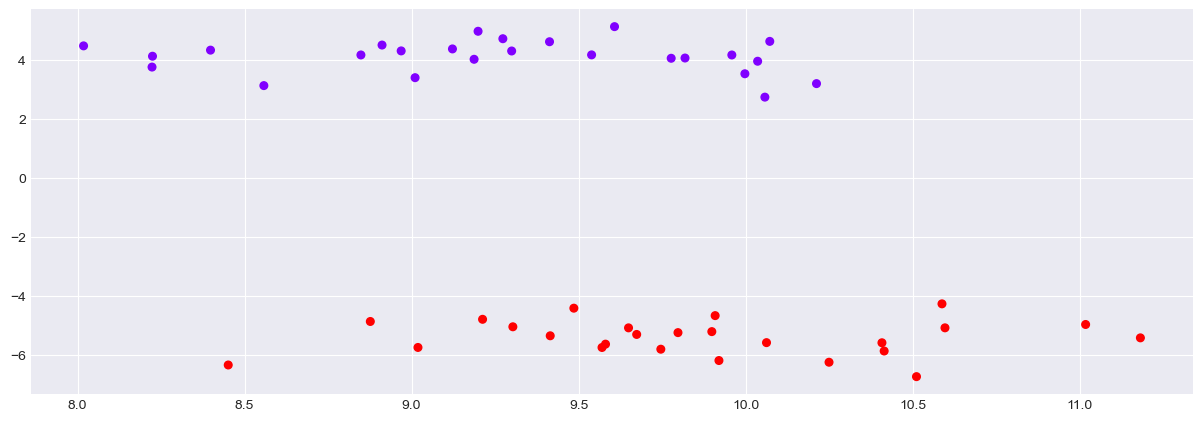

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=CMAP)

In [11]:
clf=SVC(kernel='linear')


clf.fit(X,y)

SVC(kernel='linear')

<h4>Let's plot</h4>

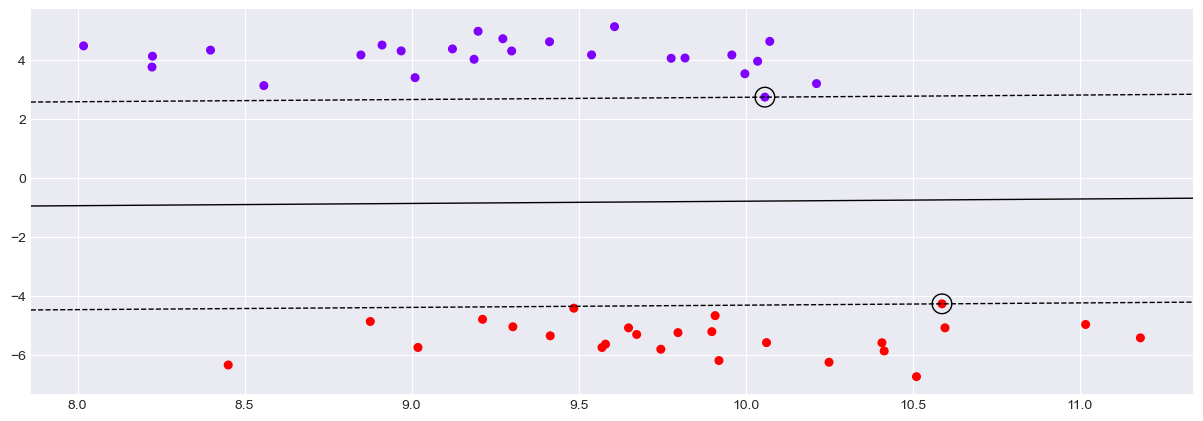

In [13]:
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=CMAP)
# X[:, 0] and X[:, 1]: Selects the first and second features of the data points for the x and y axes.
# c=y: Colors the points according to their class labels (0 or 1).
# s=30: Sets the size of the points to 30 for visibility.
# cmap=CMAP: Uses a colormap (should be defined previously) to distinguish between classes visually.

# Plot the SVC decision function to visualize the decision boundary and margins
fn_plot_svc_decision_function(clf=clf)
# clf: The trained Support Vector Classifier (SVC) whose decision function will be plotted.
# This function typically visualizes the decision boundary, indicating areas where each class is predicted.

# Highlight the support vectors in the plot
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolor='none', edgecolors='k')
# clf.support_vectors_: Accesses the support vectors (critical points) used by the SVC.
# s=200: Sets the size of the support vectors to 200, making them more prominent in the plot.
# facecolor='none': Makes the interior of the support vector markers transparent.
# edgecolors='k': Sets the edge color of the support vectors to black for visibility.

##### <h4>Using Digits Dataset</h4>

In [15]:
digits=load_digits()

In [16]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [17]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [18]:
X=digits.data
y=digits.target

In [19]:
X.shape,y.shape

((1797, 64), (1797,))

In [20]:
digits.images.shape

(1797, 8, 8)

In [21]:
plot_X=digits.images[:25]
plot_X.shape

(25, 8, 8)

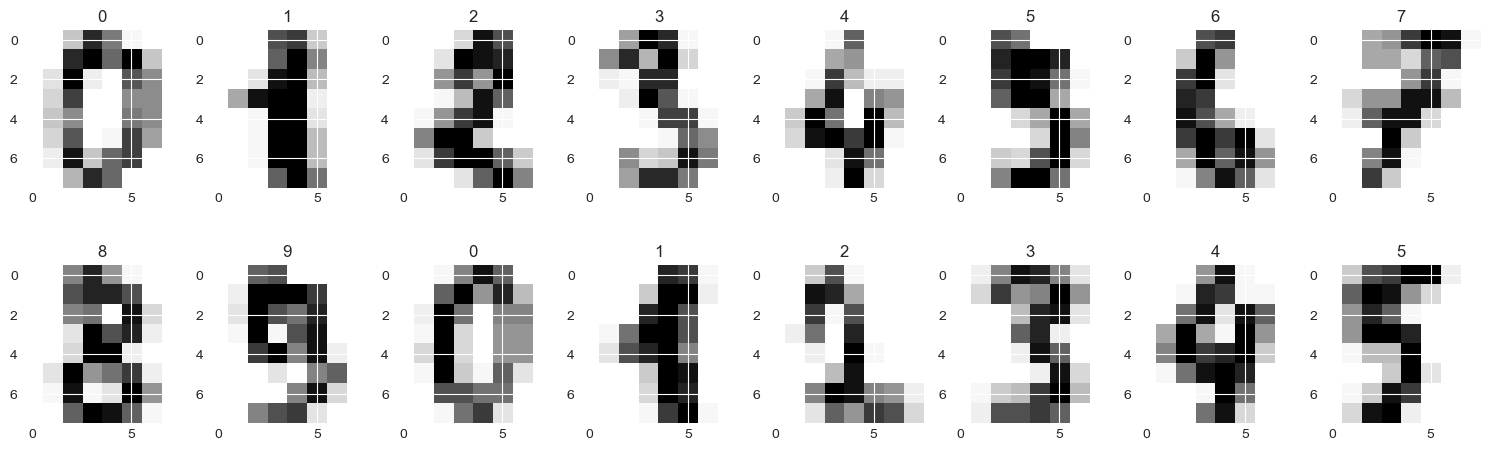

In [22]:
# Create a figure with 2 rows and 8 columns of subplots
fig, axes = plt.subplots(2, 8) 

# Flatten the 2D array of axes into a 1D array for easier iteration
axes = axes.ravel() 

# Iterate over each axis and the corresponding digit image
for count, ax in enumerate(axes):
    # Display the digit image in the current subplot
    ax.imshow(digits.images[count]) 
    # Set the title of the subplot to the corresponding label
    ax.set_title(y[count]) 

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()


In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,               # Features dataset
    y,               # Target labels
    test_size=TEST_SIZE,      # Proportion of the dataset to include in the test split
    random_state=RANDOM_STATE, # Seed used by the random number generator for reproducibility
    stratify=y      # Ensure the split maintains the same proportion of classes as in the original dataset
)

In [24]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((1437, 64), (360, 64), (360,), (1437,))

SVC: kernel: linear |F1 Score: 0.9776607203045559
SVC: kernel: rbf    |F1 Score: 0.9860662724950834
SVC: kernel: poly   |F1 Score: 0.9916467661691541


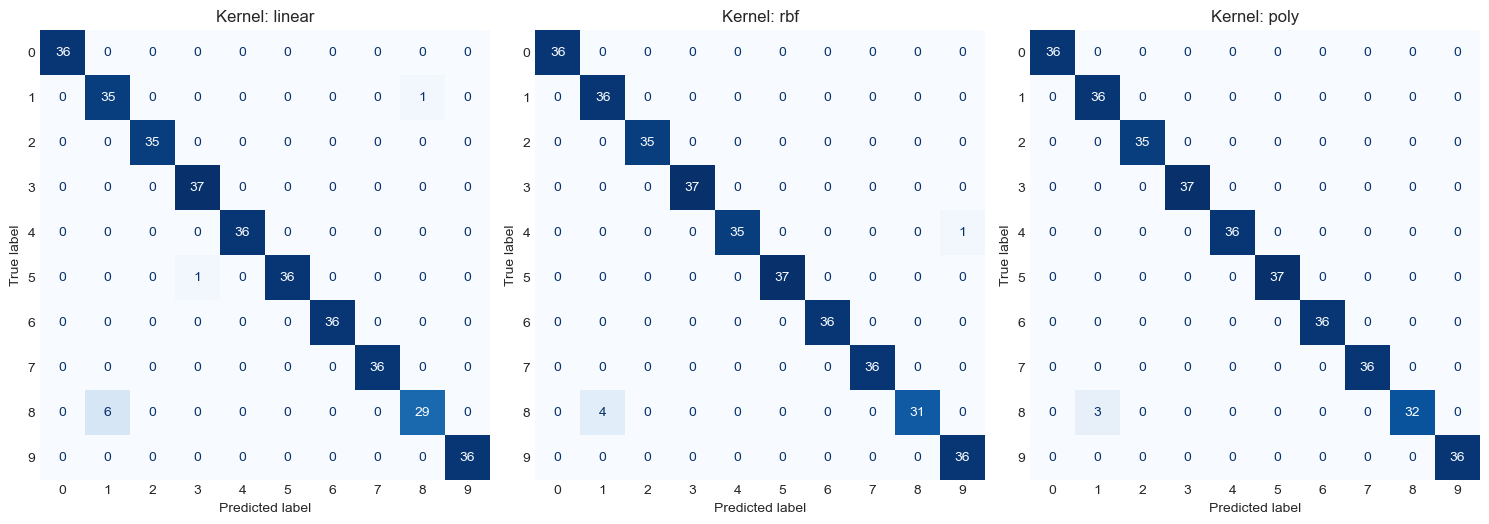

In [25]:
# Create a figure with 1 row and 3 columns for plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# Iterate over a list of SVM kernel types
for i, kernel in enumerate(['linear', 'rbf', 'poly']):
    # Train an SVM classifier with the specified kernel on the training data
    clf = SVC(kernel=kernel).fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = clf.predict(X_test)
    
    # Print the kernel type and the corresponding F1 score
    print(f'SVC: kernel: {kernel:<7s}', end='|')
    print(f'F1 Score: {f1_score(y_true=y_test, y_pred=y_pred, average="weighted")}')
    
    # Generate the confusion matrix for the predictions
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    # Create a confusion matrix display object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
    
    # Plot the confusion matrix on the corresponding axes
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
    
    # Set the title for the current subplot
    axes[i].set_title(f'Kernel: {kernel}')
    # Enable grid lines for the subplot
    axes[i].grid()

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

<h4>Linear and non-linear Models and Features</h4>

In [27]:
X,y=make_blobs(centers=4,random_state=RANDOM_STATE)
y=y%2

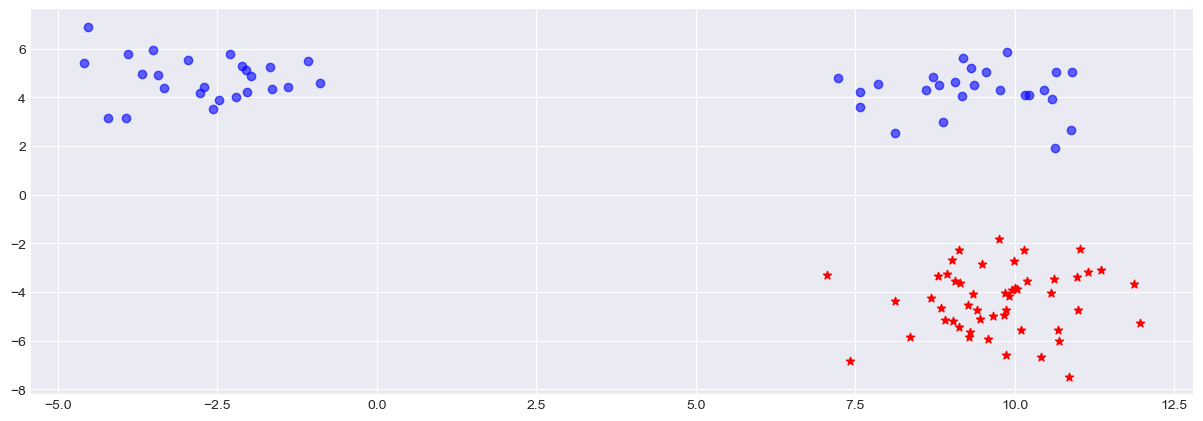

In [28]:
# Create a figure and a single axis for plotting
fig, ax = plt.subplots()

# Create a boolean mask where y is equal to 0
mask = y == 0  # True for elements where y is 0, False otherwise

# Plot points where the mask is True (y == 0) in blue
ax.scatter(X[mask, 0], X[mask, 1], c='b',alpha=0.6)  # X coordinates from the first feature, Y coordinates from the second feature

# Plot points where the mask is False (y != 0) in red
ax.scatter(X[~mask, 0], X[~mask, 1], c='r',marker='*')  # X coordinates from the first feature, Y coordinates from the second feature

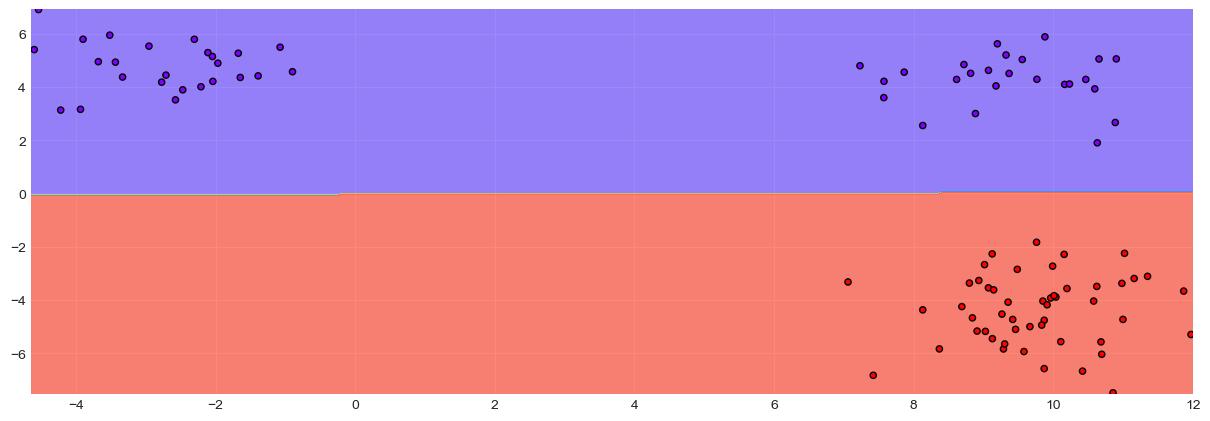

In [29]:
# Initialize a Linear SVC model with dual optimization set to 'auto' and a random seed for reproducibility
linear_svc = LinearSVC(dual='auto', random_state=RANDOM_STATE)

# Fit the model to the feature set X and target labels y
linear_svc.fit(X, y)

# Call a function to plot the decision boundary of the fitted model
fn_plot_decision_boundry(linear_svc, X, y)

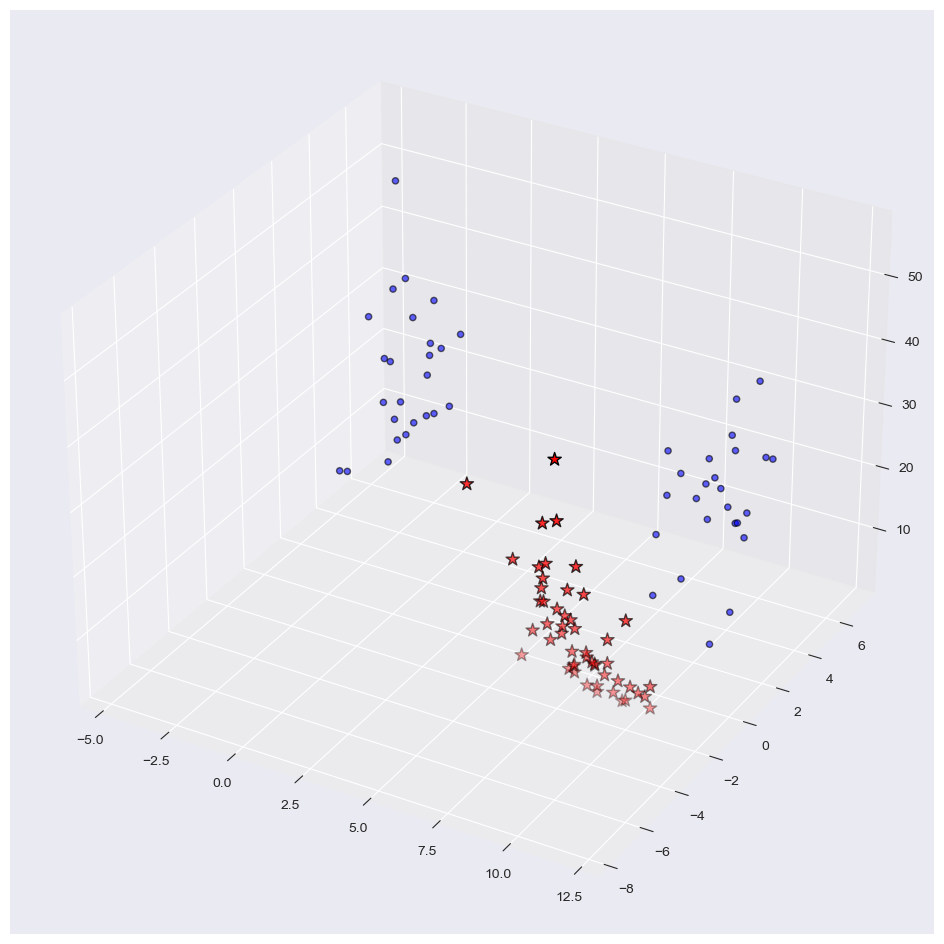

In [30]:
X_new=np.hstack([X,X[:,1:]**2]) # Create three dimwnstional data 

ax=plt.figure(figsize=(12,12)).add_subplot(projection='3d') # create 3d axis

mask = y==0 # comparing with zeros

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2],
           c='b' ,alpha=0.6, edgecolors='k') # mask = true
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2],
           c='r' ,s=100,marker='*' ,edgecolors='k') # mask = false
plt.show()

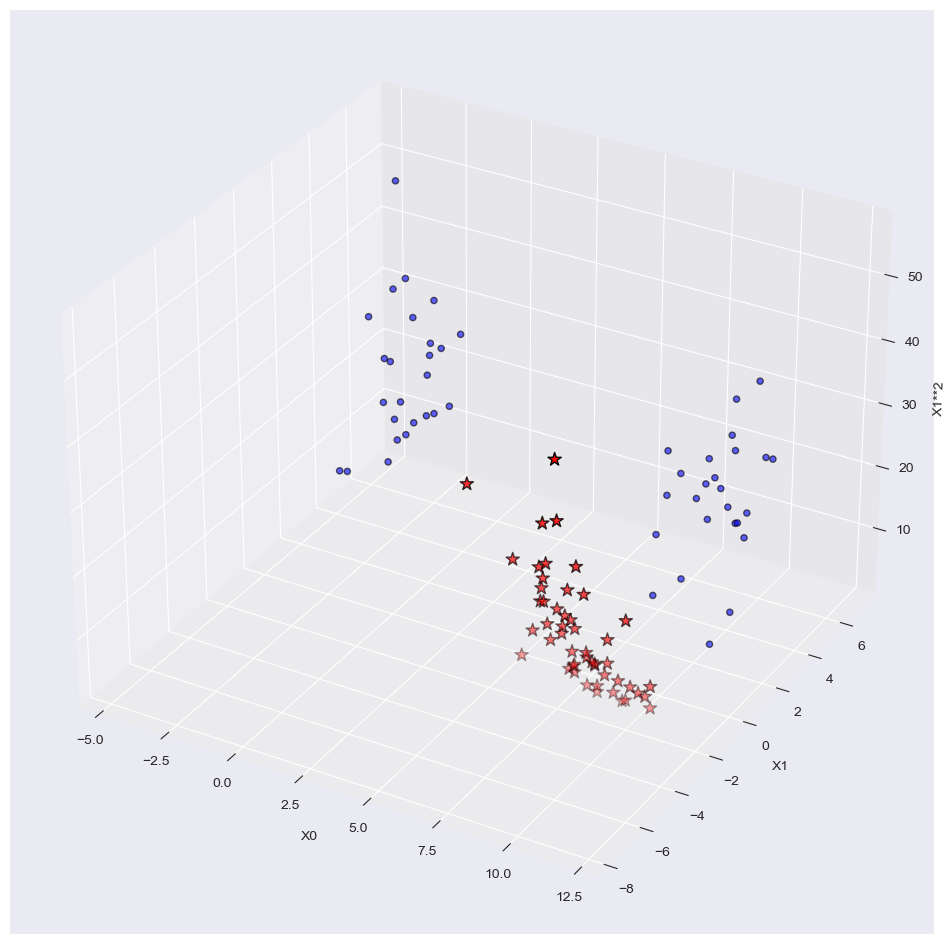

In [31]:
# Create a new feature set with the original features and the square of the second feature
X_new = np.hstack([X, X[:, 1:]**2])

# Set up a 3D plot
ax = plt.figure(figsize=(12, 12)).add_subplot(projection='3d')

# Create a mask for points where the label is 0
mask = y == 0 

# Plot points with label 0 in blue
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
           c='b', alpha=0.6, edgecolors='k')  # Blue points with black edges

# Plot points with label not 0 in red with star markers
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],
           c='r', s=100, marker='*', edgecolors='k')  # Red stars with black edges

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('X1**2')


plt.show()

In [32]:
# Create a Support Vector Classifier with a linear kernel
clf = SVC(kernel='linear')

# Train the classifier on the new feature set
clf.fit(X_new, y)

# Make predictions using the trained classifier
y_pred = clf.predict(X_new)

# Calculate and return the accuracy score of the predictions
accuracy_score(y_true=y, y_pred=y_pred)

1.0

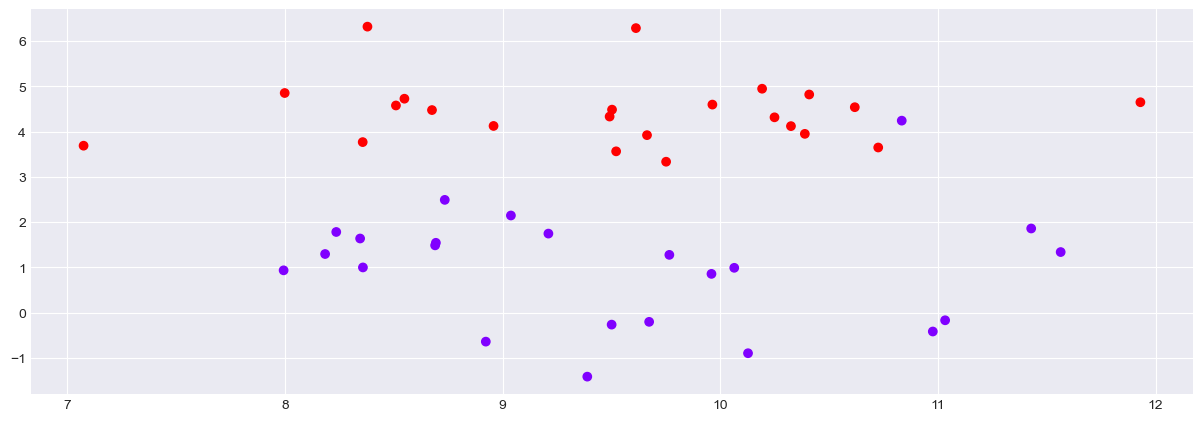

In [33]:
# Generate synthetic data with 2 centers and 50 samples
X, y = make_blobs(centers=2, random_state=4, n_samples=50)

# Change the labels of specific samples to 0
y[np.array([2, 27])] = 0

# Create a mask to filter samples
mask = np.ones(len(X))
mask = np.ma.make_mask(mask)

# Update the mask to exclude specific samples
mask[np.array([0, 1, 5, 26])] = 0

# Apply the mask to the data and labels
X, y = X[mask], y[mask]

# Create a scatter plot
fig, ax = plt.subplots()

# Create a mask for points with label 1
mask = y == 1

# Plot the data points, coloring them based on their labels
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=CMAP)

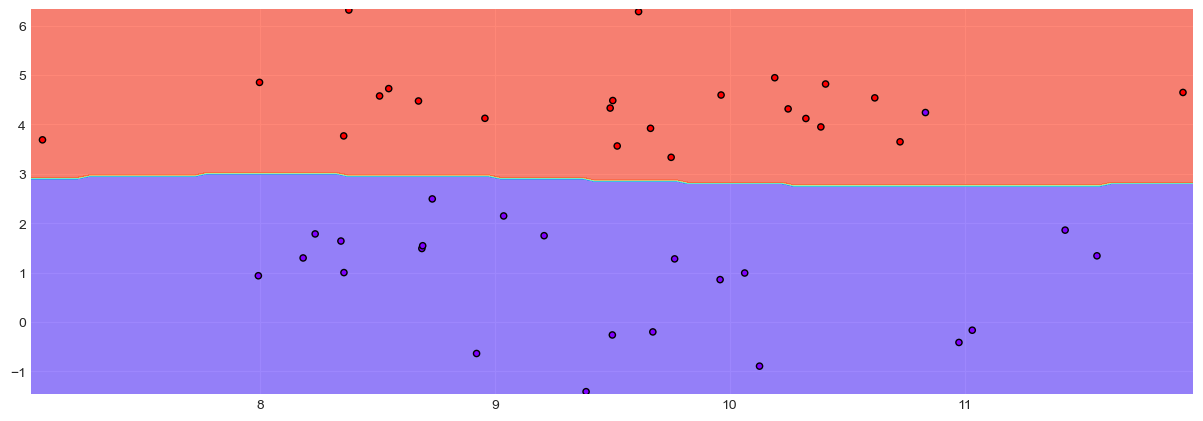

In [34]:
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)

fn_plot_decision_boundry(svm,X,y)

In [35]:
X.min(axis = 0)

array([ 7.07391193, -1.41342865])

<h4>Load Iris Dataset</h4>

In [37]:
iris= load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
# Load the Iris dataset
X = iris['data']  # Features
y = iris['target']  # Target labels
target_names = iris['target_names']  # Names of the target classes

# Display the shapes of the features and labels, and the target names
X.shape, y.shape, target_names

# Create a DataFrame for the features with appropriate column names
features = pd.DataFrame(X, columns=iris['feature_names'])

# Show the first few rows of the features DataFrame
features.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


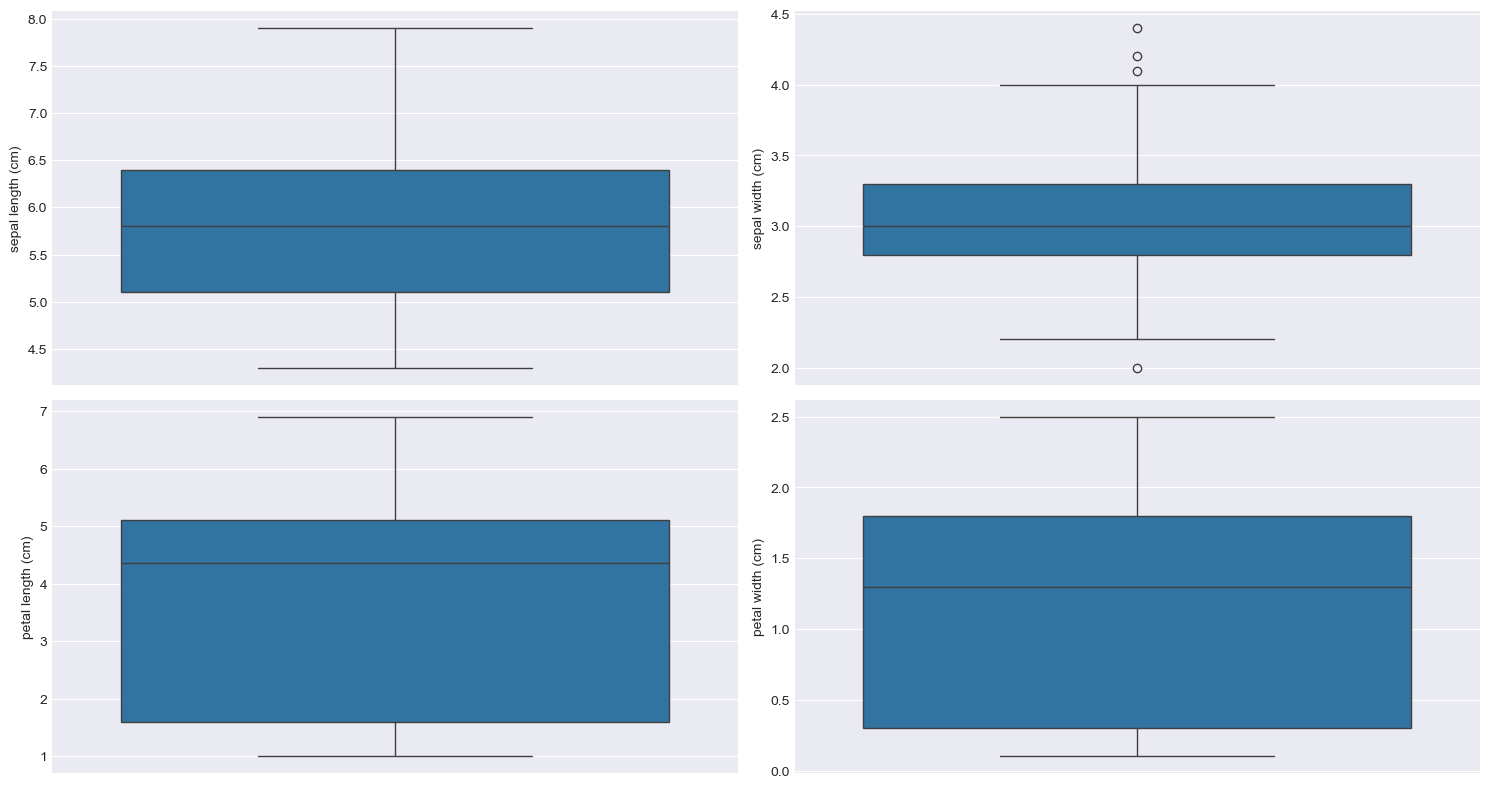

In [39]:
# Create a 2x2 grid of subplots with a specified figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over each subplot and corresponding feature
for count, ax in enumerate(axes):
    # Create a box plot for each feature in the features DataFrame
    sns.boxplot(y=features.columns[count], data=features, ax=ax)
plt.tight_layout()

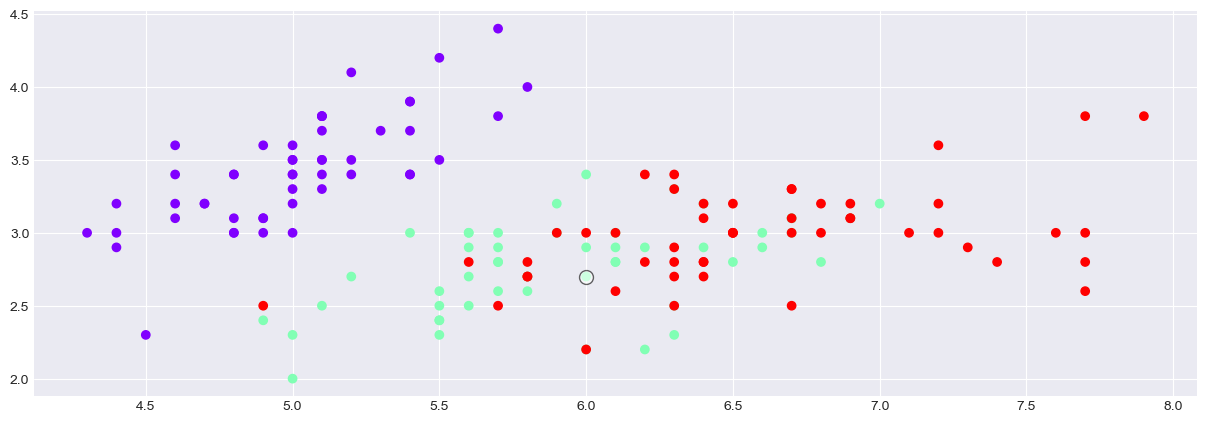

<Figure size 1500x500 with 0 Axes>

In [40]:
# Initialize a Support Vector Classifier with a radial basis function kernel
svm = SVC(kernel='rbf')

# Fit the classifier to the data
clf.fit(X, y)

# Make predictions on the training data
y_pred = clf.predict(X)

# Identify the misclassified points
xerr = X[:, 0][y != y_pred]  # X coordinates of misclassified points
yerr = X[:, 1][y != y_pred]  # Y coordinates of misclassified points

# Create a scatter plot
fig, ax = plt.subplots()

# Plot the original data points, colored by their true labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=CMAP)

# Highlight the misclassified points in white
plt.scatter(xerr, yerr, color='w', s=100, alpha=0.6, edgecolors='k')

# Show the plot
plt.show()

# Adjust layout to prevent overlap
plt.tight_layout()

In [41]:
# Initialize PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)

# Fit PCA on the data and transform it to the new space
pca_x = pca.fit_transform(X)

# Display the shapes of the original and PCA-transformed data
X.shape, pca_x.shape

((150, 4), (150, 2))

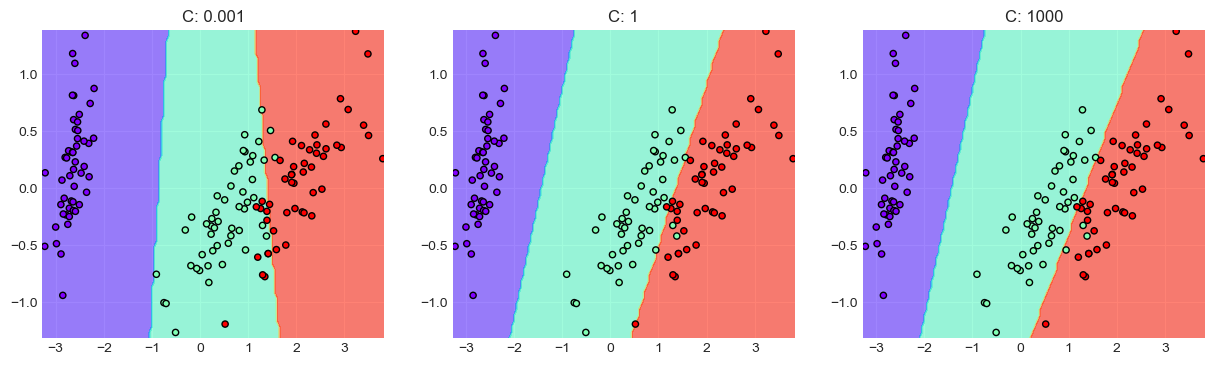

In [42]:
# Create a 1x3 grid of subplots with a specified figure size
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# List of different C values to test
C_value = [0.001, 1, 1000]
i = 0  # Initialize index for subplot

# Iterate over the different C values
for C in C_value:
    # Initialize the SVC classifier with a linear kernel and the current C value
    clf = SVC(kernel='linear', C=C)
    
    # Fit the classifier on the PCA-transformed data
    clf.fit(pca_x, y)
    
    # Select the corresponding subplot axis
    ax = axes[i]
    
    # Plot the decision boundary for the current classifier
    fn_plot_decision_boundry(clf, pca_x, y, ax)
    
    # Increment the index for the next subplot
    i += 1
    
    # Set the title for the current subplot to show the C value
    ax.set_title(f'C: {C}')

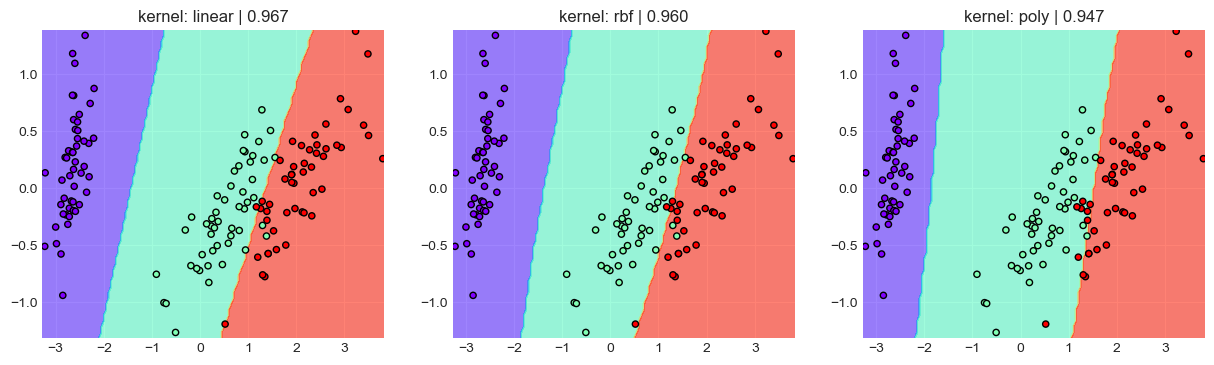

In [43]:
# Create a 1x3 grid of subplots with a specified figure size
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# List of different kernel types to test
kernels = ['linear', 'rbf', 'poly']
i = 0  # Initialize index for subplot

# Iterate over each kernel type
for kernel in kernels:
    # Initialize the SVC classifier with the current kernel type
    clf = SVC(kernel=kernel)
    
    # Fit the classifier on the PCA-transformed data
    clf.fit(pca_x, y)
    
    # Select the corresponding subplot axis
    ax = axes[i]
    
    # Plot the decision boundary for the current classifier
    fn_plot_decision_boundry(clf, pca_x, y, ax)
    
    # Increment the index for the next subplot
    i += 1
    y_pred=clf.predict(pca_x)
    acc=accuracy_score(y_true=y, y_pred=y_pred)
    # Set the title for the current subplot to show the kernel type
    ax.set_title(f'kernel: {kernel} | {acc:0.3f}')

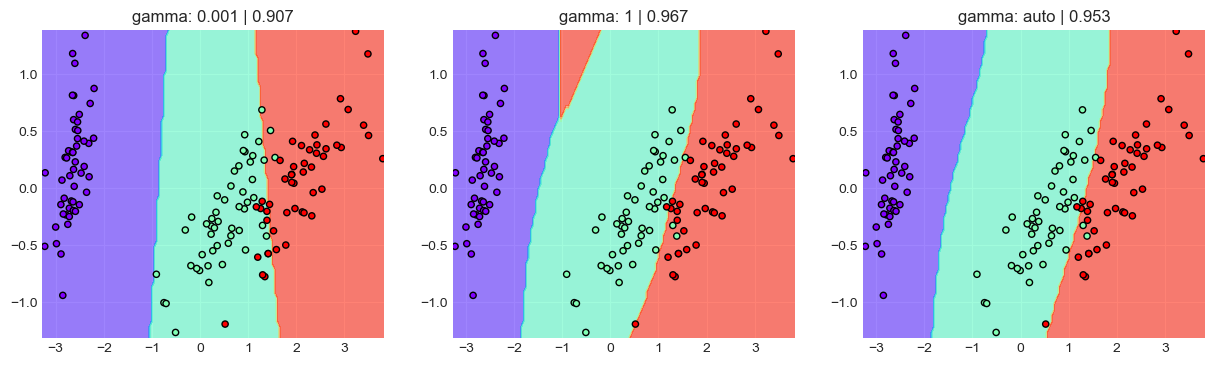

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
gammas=[0.001,1,'auto']

i = 0  
for g in gammas:
    clf = SVC(kernel='rbf',gamma=g)
    
    clf.fit(pca_x, y)
    
    ax = axes[i]
    
    fn_plot_decision_boundry(clf, pca_x, y, ax)
    
    i += 1
    y_pred=clf.predict(pca_x)
    acc=accuracy_score(y_true=y, y_pred=y_pred)
    
    ax.set_title(f'gamma: {g} | {acc:0.3f}')

<h4>K Nearest Neighbor</h4>

In [46]:
clf=KNeighborsClassifier(n_neighbors=1)

clf.fit(X,y)

y_pred=clf.predict(X)

accuracy_score(y_true=y, y_pred=y_pred)

1.0